<a href="https://colab.research.google.com/github/diya1850/dectection/blob/main/Cat_Dectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
from ultralytics import YOLO

# Check version
import ultralytics
ultralytics.checks()


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/107.7 GB disk)


In [3]:
from google.colab import files

# Upload any image you want to test
uploaded = files.upload()

# The uploaded image will now be available in Colab
# You can check the filename like this:
import os
image_path = list(uploaded.keys())[0]
print("Uploaded file:", image_path)


Saving cut cat serhio 02-1813x1811-720x719.jpg to cut cat serhio 02-1813x1811-720x719.jpg
Uploaded file: cut cat serhio 02-1813x1811-720x719.jpg


In [4]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 336MB/s]



image 1/1 /content/cut cat serhio 02-1813x1811-720x719.jpg: 640x640 1 cat, 398.4ms
Speed: 16.9ms preprocess, 398.4ms inference, 29.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


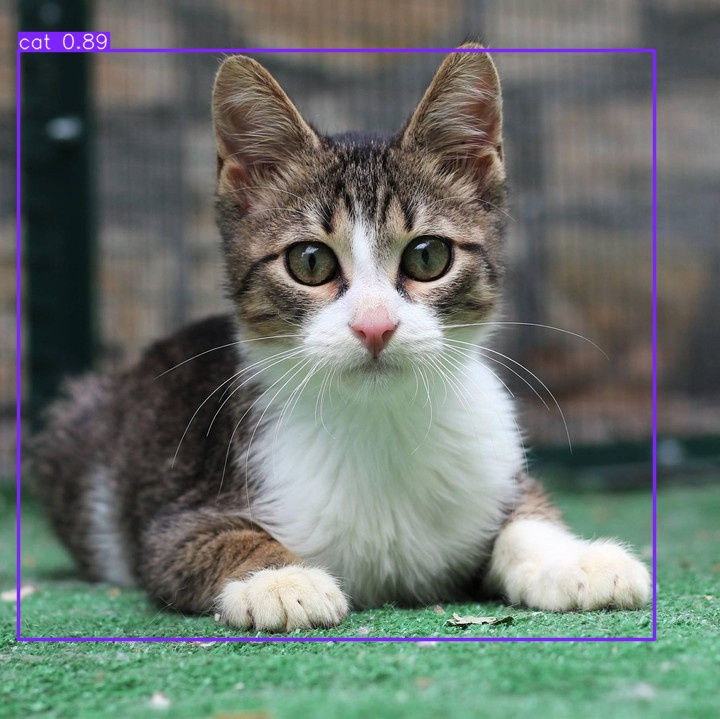

In [5]:
# Run prediction on the uploaded image
results = model.predict(source=image_path, save=True)

# Show prediction results (saved in 'runs/detect/predict/')
from IPython.display import Image
Image(filename='runs/detect/predict/' + os.path.basename(image_path))


In [6]:
# Print class names, confidence scores, and bounding box coordinates
for r in results:
    boxes = r.boxes
    for box in boxes:
        cls_id = int(box.cls)  # class index
        cls_name = model.names[cls_id]  # class name
        confidence = float(box.conf)  # confidence score
        coords = box.xyxy.tolist()  # box coordinates
        print(f"Class: {cls_name}, Confidence: {confidence:.2f}, Box Coordinates: {coords}")


Class: cat, Confidence: 0.89, Box Coordinates: [[18.518211364746094, 50.71742248535156, 654.8285522460938, 639.6185302734375]]


In [10]:
from google.colab import files
files.download('runs/detect/predict/' + os.path.basename(image_path))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>